In [1]:
import datajoint as dj
import behavior_database as db

Connecting root@127.0.0.1:3306


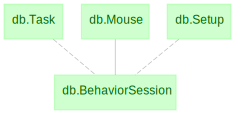

In [2]:
dj.ERD(db.schema)

In [ ]:
#db.schema.drop()

In [3]:
print(db.BehaviorSession.definition)
print(db.Mouse.definition)


    # behavior session
    -> Mouse
    session_id: int
    ---
    -> Task
    -> Setup
    date = CURRENT_TIMESTAMP: timestamp
    experimenter: varchar(127)
    study_name: varchar(127)
    max_rewards: int
    rewards_achieved: int
    comments = null: varchar(2000)
    

    # a table of all mice used for behavior
    subject_id: int # unique ID for this mouse
    ---
    dob: date
    sex = 'U': enum('F','M', 'U') # sex of the mouse
    strain = 'B6': enum('IT-Cre', 'PT-Cre', 'B6')
    


In [4]:
# start inserting some dummy data
my_mice = db.Mouse()

my_mice.insert([
    (1, '2020-01-31', 'M', None),
    (2, '2020-01-15', 'M', 'IT-Cre'),
    (3, '2020-01-15', 'F', None),
    (4, '2020-01-10', 'M', None),
    (5, '2020-02-03', 'F', 'PT-Cre'), 
    (6, '2020-01-31', 'M', None),
])


In [5]:
my_mice

subject_id unique ID for this mouse,dob,sex sex of the mouse,strain
1,2020-01-31,M,B6
2,2020-01-15,M,IT-Cre
3,2020-01-15,F,B6
4,2020-01-10,M,B6
5,2020-02-03,F,PT-Cre
6,2020-01-31,M,B6


In [6]:
print(db.Task.definition)


    # task type
    task_name: varchar(31)
    ---
    target_size=null: int # size of target in mm
    target_position=null: enum('left','right')
    


In [7]:
# start task table
tasks = db.Task()

tasks.insert([
    ('Touch', None, None),
    ('Push', None, None),
    ('Target_1', 5, 'right'),
    ('Target_2', 5, 'left'),
    ('ChHome', 5, 'right'),

])

tasks

task_name,target_size size of target in mm,target_position
ChHome,5,right
Push,None,None
Target_1,5,right
Target_2,5,left
Touch,None,None


In [8]:
print(db.Setup.definition)


    # setup for training
    setup_id: int
    ---
    setup_type: enum('TeenScience', 'MaxonEpos')
    setup_location: enum('BehaviorRoom', '2PhotonRoom')
    


In [9]:
# start setup table
setups = db.Setup()

setups.insert([
    (1, 'TeenScience', 'BehaviorRoom'),
    (2, 'MaxonEpos', 'BehaviorRoom'),
    (3, 'MaxonEpos', 'BehaviorRoom'),
    (4, 'MaxonEpos', 'BehaviorRoom'),
    (5, 'MaxonEpos', '2PhotonRoom'),
])

setups

setup_id,setup_type,setup_location
1,TeenScience,BehaviorRoom
2,MaxonEpos,BehaviorRoom
3,MaxonEpos,BehaviorRoom
4,MaxonEpos,BehaviorRoom
5,MaxonEpos,2PhotonRoom


In [10]:
print(db.BehaviorSession.definition)


    # behavior session
    -> Mouse
    session_id: int
    ---
    -> Task
    -> Setup
    date = CURRENT_TIMESTAMP: timestamp
    experimenter: varchar(127)
    study_name: varchar(127)
    max_rewards: int
    rewards_achieved: int
    comments = null: varchar(2000)
    


In [11]:
sessions = db.BehaviorSession()

In [12]:
sessions.insert([
    (1, 1, 'Touch', 1, None, 'AliceMosberger', 'TS-1', 50, 50, None),
    (2, 1, 'Touch', 1, None, 'AliceMosberger', 'TS-1', 50, 20, None),
    (3, 1, 'Touch', 2, None, 'AliceMosberger', 'TS-1', 50, 28, None),
    (4, 1, 'Touch', 2, None, 'AliceMosberger', 'TS-1', 50, 30, None),
    (5, 1, 'Touch', 3, None, 'AliceMosberger', 'TS-1', 50, 10, None),
    (6, 1, 'Touch', 3, None, 'AliceMosberger', 'TS-1', 50, 50, None),
])

In [13]:
sessions

subject_id unique ID for this mouse,session_id,task_name,setup_id,date,experimenter,study_name,max_rewards,rewards_achieved,comments
1,1,Touch,1,2020-04-28 17:40:23,AliceMosberger,TS-1,50,50,None
2,1,Touch,1,2020-04-28 17:40:23,AliceMosberger,TS-1,50,20,None
3,1,Touch,2,2020-04-28 17:40:23,AliceMosberger,TS-1,50,28,None
4,1,Touch,2,2020-04-28 17:40:23,AliceMosberger,TS-1,50,30,None
5,1,Touch,3,2020-04-28 17:40:23,AliceMosberger,TS-1,50,10,None
6,1,Touch,3,2020-04-28 17:40:23,AliceMosberger,TS-1,50,50,None


In [ ]:
my_mice.drop()
setups.drop()
tasks.drop()
sessions.drop()